In [19]:
# Import necessary modules
import pandas as pd
from datetime import datetime as dt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

%matplotlib inline

In [20]:
# Homes contains data on home sales, zipcodes is for encoding cities later
homes = pd.read_csv('data/kc_house_data.csv')
zipcodes = pd.read_csv('data/zips.csv')

# Columns suggested to drop by project description
cols_to_drop = (['id','date','sqft_above','sqft_basement',
                'lat','long','sqft_living15','sqft_lot15'])
homes = homes.drop(cols_to_drop,axis=1)

# Exchange the zipcode column for a city column based on zipcode
homes = homes.merge(zipcodes,how='left',on='zipcode').drop('zipcode',axis=1)
#homes.info()

In [21]:
homes.loc[homes.bedrooms > 20,'bedrooms'] = 3

In [22]:
waterfront_rule = {'NO':0,'YES':1}
waterfronts = homes.waterfront.fillna('NO').map(waterfront_rule)
homes.waterfront = waterfronts

In [23]:
view_rule = {'NONE':0,'FAIR':1,'AVERAGE':2,'GOOD':3,'EXCELLENT':4}
views = homes.view.fillna('NONE').map(view_rule)
homes.view = views

In [24]:
condition_rule = {'Poor':0,'Fair':1,'Average':2,'Good':3,'Very Good':4}
conditions = homes.condition.map(condition_rule)
homes.condition = conditions

In [25]:
grades = homes.grade.apply(lambda x: int(x.split()[0]))
homes.grade = grades

In [26]:
homes.yr_renovated.fillna(0,inplace=True)
def since_reno(home):
    if home.yr_renovated < home.yr_built:
        return dt.today().year - home.yr_built
    else:
        return dt.today().year - home.yr_renovated
homes['since_reno'] = homes.apply(lambda x:since_reno(x),axis=1)
homes.drop('yr_renovated',inplace=True,axis=1)

In [27]:
homes['age'] = dt.today().year - homes['yr_built']
homes.drop('yr_built',inplace=True,axis=1)

In [28]:
cities = pd.get_dummies(homes.city,prefix='city',sparse=False,drop_first=True)
homes.drop('city',inplace=True,axis=1)

In [29]:
# Modifications to test go here
homes.drop('sqft_lot',inplace=True,axis=1)
homes.drop('since_reno',inplace=True,axis=1)
homes.price = homes.price.apply(np.log)
homes.sqft_living = homes.sqft_living.apply(np.log)

In [30]:
scaler = StandardScaler()
homes_scaled = scaler.fit_transform(homes)
homes_scaled = pd.DataFrame(homes_scaled,columns=homes.columns)

In [31]:
homes = pd.concat([homes_scaled,cities],axis=1)
homes = sm.add_constant(homes)
X = homes.drop('price',axis=1)
y = homes.price

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=271828)

In [32]:
regressor = LinearRegression().fit(X_train,y_train)
print(regressor.score(X_train,y_train))
print(regressor.score(X_test,y_test))

0.7786636472903896
0.7829954144241602


In [58]:
cv_regressor = LinearRegression()
np.mean(cross_validate(cv_regressor,X_train,y_train)['test_score'])

0.7776682688964363

In [34]:
sm_regressor = sm.OLS(y_train,X_train).fit()
sm_regressor.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     1777.
Date:                Fri, 18 Feb 2022   Prob (F-statistic):               0.00
Time:                        16:24:36   Log-Likelihood:                -10800.
No. Observations:               16197   AIC:                         2.167e+04
Df Residuals:                   16164   BIC:                         2.192e+04
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.7567      0.018    -41.539      0.000      -0.792      -0.721
bedrooms              -0.0615      0.005    -12.111      0.000      -0.072      -0.052
bathrooms              0.0930      0.007     14.067      0.000       0.080       0.106
sqft_living            0.3408      0.008     43.799      0.000       0.326       0.356
floors                 0.0826      0.005     17.150      0.000       0.073       0.092
waterfront             0.0514      0.004     12.753      0.000       0.043       0.059
view                   0.0779      0.004     18.141      0.000       0.069       0.086
condition              0.0654      0.004     15.939      0.000       0.057       0.073
grade                  0.3801      0.006     58.986      0.000       0.367       0.393
age                    0.2021      0.006     36.188      0.000       0.191       0.213
city_Bellevue          1.3018      0.024     55.113      0.000       1.256       1.348
city_Black_Diamond     0.5165      0.057      9.103      0.000       0.405       0.628
city_Bothell           0.7780      0.042     18.464      0.000       0.695       0.861
city_Carnation         0.6420      0.052     12.292      0.000       0.540       0.744
city_Duvall            0.6234      0.043     14.421      0.000       0.539       0.708
city_Enumclaw          0.0913      0.041      2.254      0.024       0.012       0.171
city_Fall_City         0.8832      0.066     13.454      0.000       0.755       1.012
city_Federal_Way      -0.0861      0.026     -3.263      0.001      -0.138      -0.034
city_Issaquah          0.9142      0.027     33.283      0.000       0.860       0.968
city_Kenmore           0.7283      0.038     19.000      0.000       0.653       0.803
city_Kent              0.0717      0.024      3.004      0.003       0.025       0.118
city_Kirkland          1.1275      0.025     44.513      0.000       1.078       1.177
city_Maple_Valley      0.3243      0.029     11.237      0.000       0.268       0.381
city_Medina            2.2375      0.080     27.907      0.000       2.080       2.395
city_Mercer_Island     1.4751      0.037     39.461      0.000       1.402       1.548
city_North_Bend        0.6226      0.041     15.155      0.000       0.542       0.703
city_Redmond           1.1057      0.025     43.598      0.000       1.056       1.155
city_Renton            0.4365      0.023     19.313      0.000       0.392       0.481
city_Sammamish         0.9472      0.027     35.041      0.000       0.894       1.000
city_Seattle           0.8816      0.020     44.935      0.000       0.843       0.920
city_Snoqualmie        0.7705      0.036     21.145      0.000       0.699       0.842
city_Vashon            0.6442      0.053     12.159      0.000       0.540       0.748
city_Woodinville       0.8434      0.0

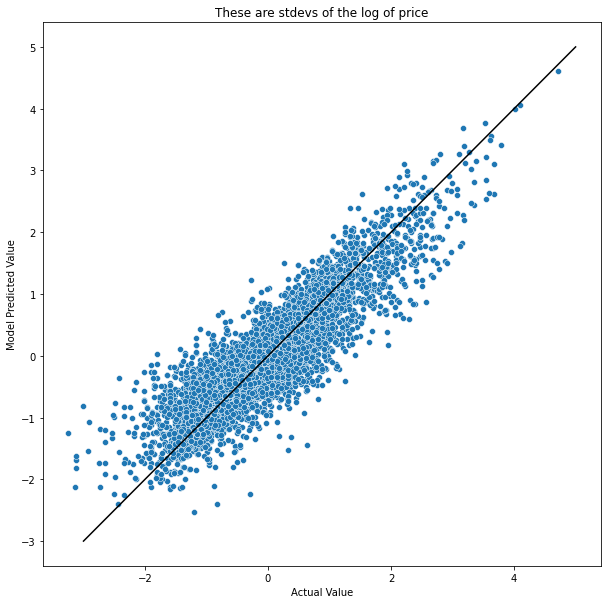

In [57]:
pred = regressor.predict(X_test)
fig,ax = plt.subplots(figsize=(10,10))
ax = sns.scatterplot(x = y_test,y = pred)
y_x = np.linspace(-3,5,100)
ax.plot(y_x,y_x,color='k'); # Plots y=x
ax.set_title('These are stdevs of the log of price');
ax.set_ylabel('Model Predicted Value');
ax.set_xlabel('Actual Value');